In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

## PREPARE DATA

In [2]:
import glob
import os

folder_name = 'dataset'
file_type = 'csv'
seperator =','
df = pd.concat([pd.read_csv(f, sep=seperator) for f in glob.glob(folder_name + "/*."+file_type)], ignore_index=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5667717 entries, 0 to 5667716
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 562.1+ MB


In [4]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665968,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


In [5]:
df.tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
5667712,43ABEE85B6E15DCA,classic_bike,2022-12-05 06:51:04,2022-12-05 06:54:48,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member
5667713,F041C89A3D1F0270,electric_bike,2022-12-14 17:06:28,2022-12-14 17:19:27,Bernard St & Elston Ave,18016,Seeley Ave & Roscoe St,13144,41.949980,-87.714019,41.943403,-87.679618,member
5667714,A2BECB88430BE156,classic_bike,2022-12-08 16:27:47,2022-12-08 16:32:20,Wacker Dr & Washington St,KA1503000072,Green St & Madison St,TA1307000120,41.883143,-87.637242,41.881859,-87.649264,member
5667715,37B392960E566F58,classic_bike,2022-12-28 09:37:38,2022-12-28 09:41:34,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member
5667716,2DD1587210BA45AE,classic_bike,2022-12-09 00:27:25,2022-12-09 00:35:28,Southport Ave & Waveland Ave,13235,Seeley Ave & Roscoe St,13144,41.948150,-87.663940,41.943403,-87.679618,casual


In [6]:
print('The dataset has', df.shape[0], 'rows and', df.shape[1], 'columns.')

The dataset has 5667717 rows and 13 columns.


## PROCESS DATA

In [7]:
# Check the data for duplicates
print('Shape before dropping duplicates', df.shape)
df = df.drop_duplicates()
print('Shape after dropping duplicates', df.shape)

Shape before dropping duplicates (5667717, 13)
Shape after dropping duplicates (5667717, 13)


=> The data has no duplicates

In [8]:
# Check the data for missing values
print(np.sum(df.isna()), '\n')
print(np.sum(df.isnull()), '\n')

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    833064
start_station_id      833064
end_station_name      892742
end_station_id        892742
start_lat                  0
start_lng                  0
end_lat                 5858
end_lng                 5858
member_casual              0
dtype: int64 

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    833064
start_station_id      833064
end_station_name      892742
end_station_id        892742
start_lat                  0
start_lng                  0
end_lat                 5858
end_lng                 5858
member_casual              0
dtype: int64 



In [9]:
print(df.isnull().sum())

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    833064
start_station_id      833064
end_station_name      892742
end_station_id        892742
start_lat                  0
start_lng                  0
end_lat                 5858
end_lng                 5858
member_casual              0
dtype: int64


In [10]:
# for col in missing_data.columns.values.tolist():
#     print(col)
#     print(missing_data[col].value_counts())
#     print('')

=> There are lots of missing values at 6 columns named: **start_station_name, start_station_id, end_station_name, end_station_id, end_lat, end_lng**

In [11]:
# Convert string to datetime
df['ended_at'] = df['ended_at'].astype('datetime64[ns]')
df['started_at'] = df['started_at'].astype('datetime64[ns]')

# Create a column called “ride_length”
# Calculate the length of each ride by subtracting the column “started_at” from the column “ended_at”
df['ride_length'] = df['ended_at'] - df['started_at']

In [12]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,00:02:57
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665968,42.012560,-87.674367,casual,00:04:21
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,00:04:21
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,00:14:56
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,00:06:02


In [13]:
# Create a column called “day_of_week”
# Calculate the day of the week that each ride started
df['day_of_week'] = df['started_at'].dt.dayofweek

In [14]:
df['day_name_of_week']= df['started_at'].dt.day_name()

In [15]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,day_name_of_week
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,00:02:57,3,Thursday
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665968,42.012560,-87.674367,casual,00:04:21,0,Monday
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,00:04:21,1,Tuesday
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,00:14:56,1,Tuesday
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,00:06:02,3,Thursday


# ANALYZE

In [16]:
df['ride_length'].describe()

count                   5667717
mean     0 days 00:19:26.597144
std      0 days 02:56:07.687857
min           -8 days +19:26:39
25%             0 days 00:05:49
50%             0 days 00:10:17
75%             0 days 00:18:28
max            28 days 17:47:15
Name: ride_length, dtype: object

In [17]:
print('Max of ride_length:', max(df['ride_length']))
print('Min of ride_length:', min(df['ride_length']))
print('Mean of ride_length:', df['ride_length'].mean())
print('Mode of ride_length:', df['ride_length'].mode())

Max of ride_length: 28 days 17:47:15
Min of ride_length: -8 days +19:26:39
Mean of ride_length: 0 days 00:19:26.597144
Mode of ride_length: 0   00:05:23
dtype: timedelta64[ns]


In [18]:
# Check the number of member and casual
df.groupby('member_casual').size()

member_casual
casual    2322032
member    3345685
dtype: int64

<AxesSubplot:xlabel='member_casual'>

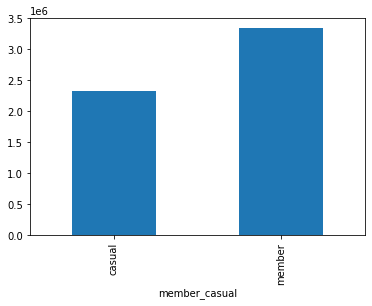

In [25]:
df.groupby('member_casual').ride_id.count().plot.bar(ylim=0)

In [24]:
# Check the number of day name of week
df.groupby('day_name_of_week').size()

day_name_of_week
Friday       801787
Monday       751014
Saturday     916471
Sunday       776259
Thursday     841591
Tuesday      782372
Wednesday    798223
dtype: int64

<AxesSubplot:xlabel='day_name_of_week'>

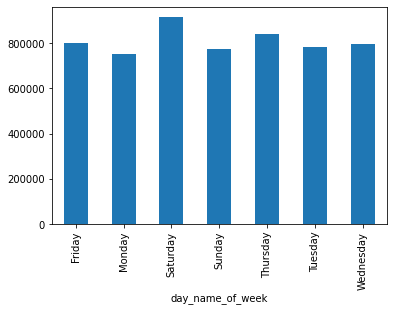

In [22]:
df.groupby('day_name_of_week').ride_id.count().plot.bar(ylim=0)

In [27]:
# plt.figure(figsize=(20, 5))
# plt.subplot(1, 2, 1)
# sns.countplot(x='member_casual', data=df)
# plt.subplot(1, 2, 2)
# sns.countplot(x='day_name_of_week', data=df);

In [28]:
# Contingency table
table = pd.crosstab(df['member_casual'], df['day_name_of_week'])
table

day_name_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
member_casual,,,,,,,
casual,334701,277675,473190,389036,309330,263746,274354
member,467086,473339,443281,387223,532261,518626,523869


In [30]:
# Check the relationship between member_casual and day_name_of_week
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' %dof)
print(expected)

dof=6
[[328487.6558205  307686.24129398 375473.05009619 318028.97679754
  344795.13231024 320533.43875568 327027.50492588]
 [473299.3441795  443327.75870602 540997.94990381 458230.02320246
  496795.86768976 461838.56124432 471195.49507412]]


In [31]:
# Interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

probability=0.950, critical=12.592, stat=112691.091


In [32]:
# Interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (failed to reject H0)')

significance=0.050, p=0.000
Dependent (reject H0)


=> member_casual and day_name_of_week

In [33]:
df_new = df.groupby(['member_casual', 'day_name_of_week'])['ride_id'].agg('count').reset_index()
df_new

,member_casual,day_name_of_week,ride_id
0,casual,Friday,334701
1,casual,Monday,277675
2,casual,Saturday,473190
3,casual,Sunday,389036
4,casual,Thursday,309330
5,casual,Tuesday,263746
6,casual,Wednesday,274354
7,member,Friday,467086
8,member,Monday,473339
9,member,Saturday,443281
